J'ai crée se notebook juste pour éviter les problèmes de merge avec git (les .ipynb merge tres mal :-/)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

In [3]:
# Load iris dataset
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
#df['target'] = pd.Series(iris.target)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
# Standardizse the features
df_norm = (df-df.mean())/df.std()
df_norm

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.897674,1.015602,-1.335752,-1.311052
1,-1.139200,-0.131539,-1.335752,-1.311052
2,-1.380727,0.327318,-1.392399,-1.311052
3,-1.501490,0.097889,-1.279104,-1.311052
4,-1.018437,1.245030,-1.335752,-1.311052
...,...,...,...,...
145,1.034539,-0.131539,0.816859,1.443994
146,0.551486,-1.278680,0.703564,0.919223
147,0.793012,-0.131539,0.816859,1.050416
148,0.430722,0.786174,0.930154,1.443994


In [5]:
# Apply PCA
pca = decomposition.PCA(n_components=4)
principalDf = pd.DataFrame(data = pca.fit_transform(df_norm), columns=['Component #1', 'Component #2', 'Component #3', 'Component #4'])
principalDf

,Component #1,Component #2,Component #3,Component #4
0,-2.257141,0.478424,-0.127280,-0.024088
1,-2.074013,-0.671883,-0.233826,-0.102663
2,-2.356335,-0.340766,0.044054,-0.028282
3,-2.291707,-0.595400,0.090985,0.065735
4,-2.381863,0.644676,0.015686,0.035803
...,...,...,...,...
145,1.864258,0.385674,0.255418,-0.387957
146,1.559356,-0.893693,-0.026283,-0.219457
147,1.516091,0.268171,0.179577,-0.118773
148,1.368204,1.007878,0.930279,-0.026041


In [6]:
# Append the target Label columns
df = pd.concat([df, pd.Series(iris.target, name='target')], axis = 1)

finalDf = pd.concat([principalDf, pd.Series(iris.target, name='target')], axis = 1)
finalDf

,Component #1,Component #2,Component #3,Component #4,target
0,-2.257141,0.478424,-0.127280,-0.024088,0
1,-2.074013,-0.671883,-0.233826,-0.102663,0
2,-2.356335,-0.340766,0.044054,-0.028282,0
3,-2.291707,-0.595400,0.090985,0.065735,0
4,-2.381863,0.644676,0.015686,0.035803,0
...,...,...,...,...,...
145,1.864258,0.385674,0.255418,-0.387957,2
146,1.559356,-0.893693,-0.026283,-0.219457,2
147,1.516091,0.268171,0.179577,-0.118773,2
148,1.368204,1.007878,0.930279,-0.026041,2


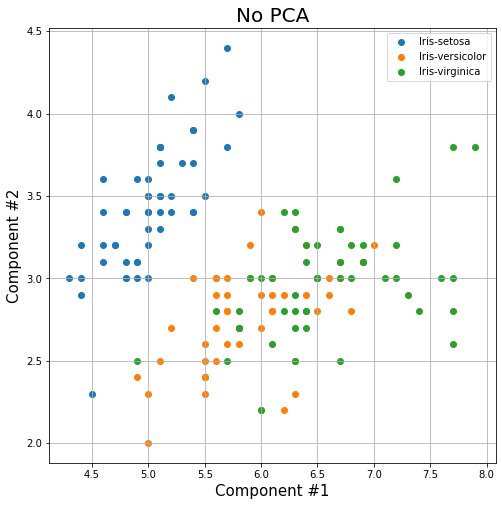

In [7]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

for idt, _ in enumerate(targets):
    ax.scatter(df[df['target'] == idt].iloc[:,0], 
               df[df['target'] == idt].iloc[:,1])

ax.legend(targets)
ax.grid()
ax.set_xlabel('Component #1', fontsize = 15)
ax.set_ylabel('Component #2', fontsize = 15)
ax.set_title('No PCA', fontsize = 20)
plt.show()

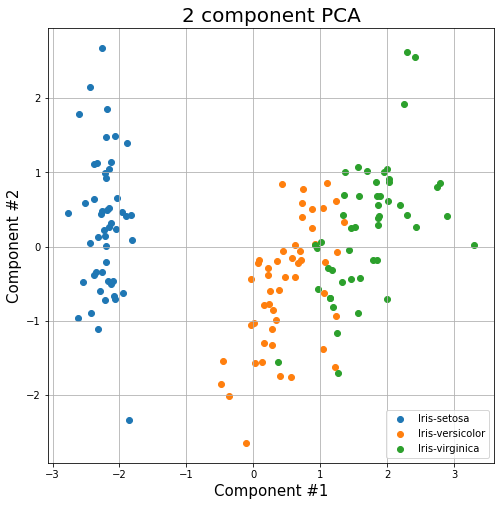

In [8]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

for idt, _ in enumerate(targets):
    ax.scatter(finalDf[finalDf['target'] == idt].iloc[:,0], 
               finalDf[finalDf['target'] == idt].iloc[:,1])

ax.legend(targets)
ax.grid()
ax.set_xlabel('Component #1', fontsize = 15)
ax.set_ylabel('Component #2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
plt.show()

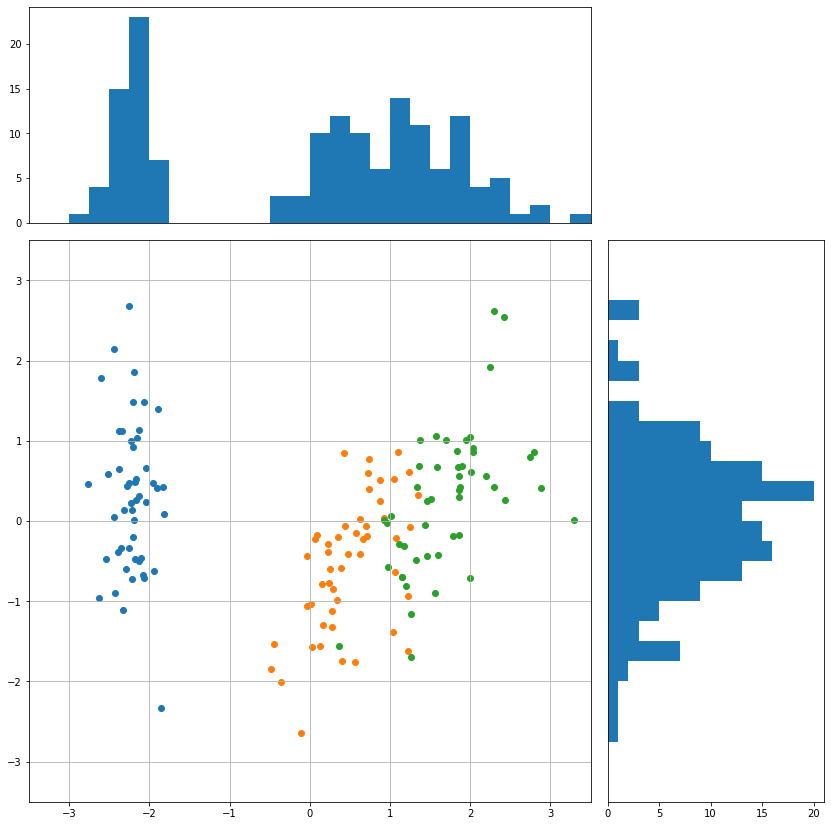

In [9]:
x = finalDf.iloc[:,0]
y = finalDf.iloc[:,1]

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.25]
rect_histy = [left_h, bottom, 0.25, height]

# start with a rectangular Figure
plt.figure(1, figsize=(12, 12))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels


# the scatter plot:
for idt, _ in enumerate(targets):
    axScatter.scatter(finalDf[finalDf['target'] == idt].iloc[:,0], 
               finalDf[finalDf['target'] == idt].iloc[:,1])
    
axScatter.grid()

# now determine nice limits by hand:
binwidth = 0.25
xymax = np.max([np.max(np.fabs(x)), np.max(np.fabs(y))])
lim = (int(xymax/binwidth) + 1) * binwidth

axScatter.set_xlim((-lim, lim))
axScatter.set_ylim((-lim, lim))

bins = np.arange(-lim, lim + binwidth, binwidth)
axHistx.hist(x, bins=bins)
axHisty.hist(y, bins=bins, orientation='horizontal')

axHistx.set_xlim(axScatter.get_xlim())
axHisty.set_ylim(axScatter.get_ylim())

axHistx.set_xticks([])
axHisty.set_yticks([])

plt.show()

-----

In [232]:
# Synthetic data
N = 900
df = pd.DataFrame()

df['age'] = np.hstack([np.linspace(10, 30,N//3), np.linspace(30, 60,N//3), np.linspace(60, 90,N//3)]) + np.random.normal(5, 10, N)
df['particle 1'] =  np.hstack([np.random.normal(10, 10,N//2), np.random.normal(30, 10,N//2)])
df['particle 2'] =  np.hstack([np.random.normal(30, 10,N//2), np.random.normal(10, 10,N//2)])
df['death'] = df['particle 1']*100
df['other'] = df['particle 2']*100


print('Synthetic data')
display(df)

# Standardizse the features
df_norm = (df-df.mean())/df.std()
print('Normalized data')
display(df_norm)


# Apply PCA
pca = decomposition.PCA(n_components=5)
PCA_df = pd.DataFrame(data = pca.fit_transform(df_norm), columns=['Component #1', 'Component #2', 'Component #3', 'Component #4','Component #5'])
print("After PCA")
print("Singular values:", pca.singular_values_)
display(PCA_df)


# Append the target Label columns
target = pd.Series(np.hstack([np.zeros(N//2),np.ones(N//2)]) , name='target')

df = pd.concat([df, target], axis = 1)
PCA_df = pd.concat([PCA_df, target], axis = 1)
PCA_df

Synthetic data


,age,particle 1,particle 2,death,other
0,11.514716,19.703216,37.567979,1970.321610,3756.797880
1,5.641747,11.237453,40.932118,1123.745304,4093.211776
2,1.444004,8.866073,26.623781,886.607279,2662.378104
3,44.382252,-0.801942,30.960607,-80.194176,3096.060673
4,-6.391896,20.590035,11.179408,2059.003516,1117.940759
...,...,...,...,...,...
895,98.136367,28.463883,23.129083,2846.388263,2312.908332
896,99.791998,7.360681,10.233004,736.068096,1023.300378
897,101.851691,27.197707,14.111077,2719.770678,1411.107727
898,94.592993,45.858581,20.511801,4585.858078,2051.180070


Normalized data


,age,particle 1,particle 2,death,other
0,-1.549526,-0.020226,1.240872,-0.020226,1.240872
1,-1.776531,-0.596221,1.477053,-0.596221,1.477053
2,-1.938783,-0.757566,0.472530,-0.757566,0.472530
3,-0.279119,-1.415360,0.776999,-1.415360,0.776999
4,-2.241659,0.040111,-0.611748,0.040111,-0.611748
...,...,...,...,...,...
895,1.798605,0.575833,0.227184,0.575833,0.227184
896,1.862599,-0.859990,-0.678191,-0.859990,-0.678191
897,1.942211,0.489685,-0.405929,0.489685,-0.405929
898,1.661645,1.759337,0.043436,1.759337,0.043436


After PCA
Singular values: [5.63896938e+01 2.97100287e+01 2.07970341e+01 5.52735451e-15
 4.15151610e-15]


,Component #1,Component #2,Component #3,Component #4,Component #5
0,1.788289,-1.225597,0.883919,-2.007851e-15,-1.468076e-15
1,2.621643,-0.884422,0.758404,8.172541e-16,1.563930e-15
2,1.919532,0.277636,1.261577,4.126339e-15,-1.153828e-15
3,2.112212,0.644021,-0.644704,-3.482585e-17,1.225726e-16
4,0.329405,0.556139,2.314935,-4.694759e-17,3.023432e-17
...,...,...,...,...,...
895,-1.058323,-0.793489,-1.500566,7.411952e-17,1.279906e-17
896,-0.602778,1.549808,-1.761556,8.079552e-17,7.290789e-17
897,-1.616300,-0.075222,-1.401156,-8.228019e-17,2.576946e-17
898,-2.247066,-1.798607,-0.819191,7.710146e-17,1.585796e-16


,Component #1,Component #2,Component #3,Component #4,Component #5,target
0,1.788289,-1.225597,0.883919,-2.007851e-15,-1.468076e-15,0.0
1,2.621643,-0.884422,0.758404,8.172541e-16,1.563930e-15,0.0
2,1.919532,0.277636,1.261577,4.126339e-15,-1.153828e-15,0.0
3,2.112212,0.644021,-0.644704,-3.482585e-17,1.225726e-16,0.0
4,0.329405,0.556139,2.314935,-4.694759e-17,3.023432e-17,0.0
...,...,...,...,...,...,...
895,-1.058323,-0.793489,-1.500566,7.411952e-17,1.279906e-17,1.0
896,-0.602778,1.549808,-1.761556,8.079552e-17,7.290789e-17,1.0
897,-1.616300,-0.075222,-1.401156,-8.228019e-17,2.576946e-17,1.0
898,-2.247066,-1.798607,-0.819191,7.710146e-17,1.585796e-16,1.0


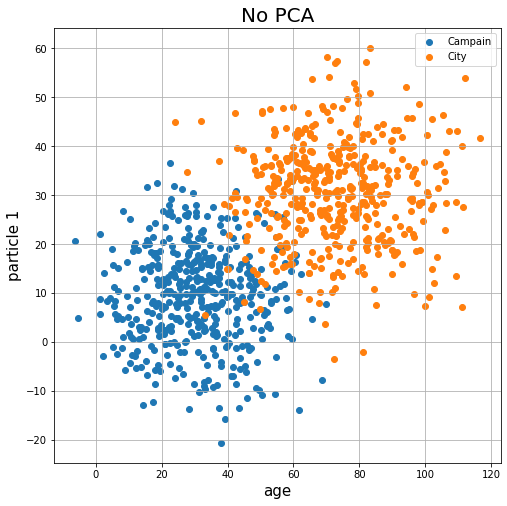

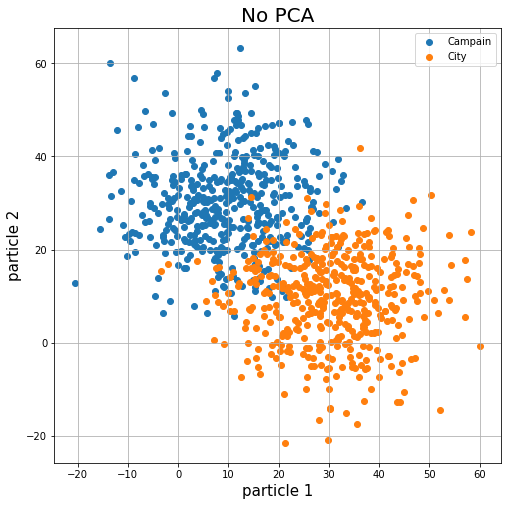

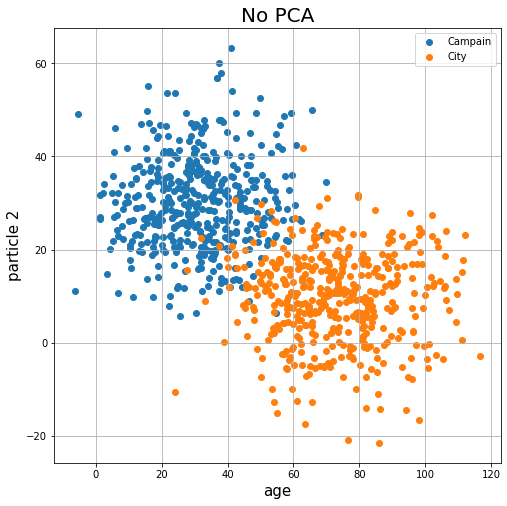

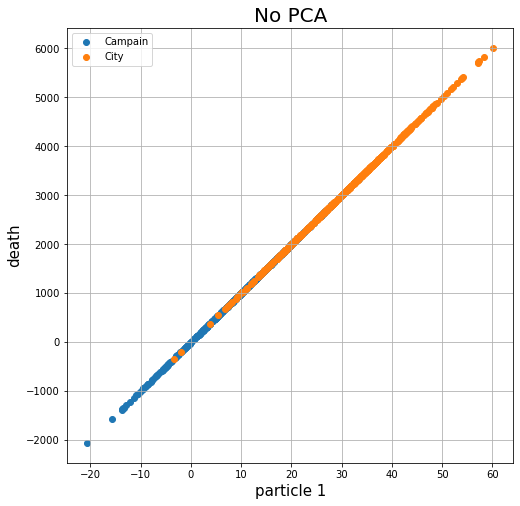

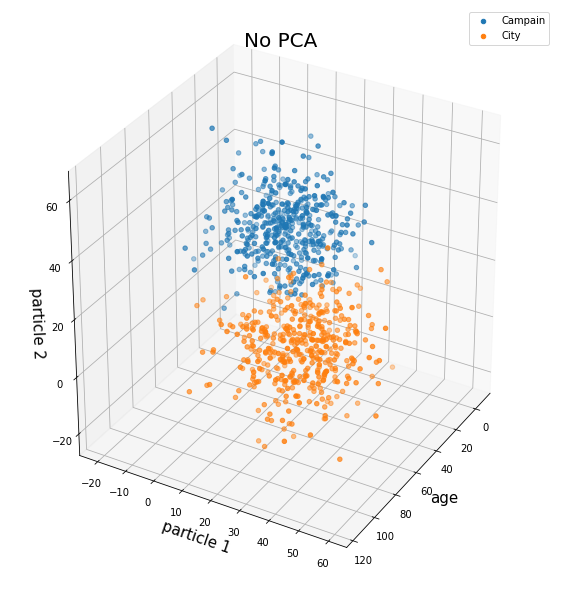

In [233]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
targets = ['Campain', 'City']

for idt, _ in enumerate(targets):
    ax.scatter(df[df['target'] == idt].iloc[:,0], 
               df[df['target'] == idt].iloc[:,1])

ax.legend(targets)
ax.grid()
ax.set_xlabel(df.columns[0], fontsize = 15)
ax.set_ylabel(df.columns[1], fontsize = 15)
ax.set_title('No PCA', fontsize = 20)
plt.show()


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 

for idt, _ in enumerate(targets):
    ax.scatter(df[df['target'] == idt].iloc[:,1], 
               df[df['target'] == idt].iloc[:,2])

ax.legend(targets)
ax.grid()
ax.set_xlabel(df.columns[1], fontsize = 15)
ax.set_ylabel(df.columns[2], fontsize = 15)
ax.set_title('No PCA', fontsize = 20)
plt.show()

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 

for idt, _ in enumerate(targets):
    ax.scatter(df[df['target'] == idt].iloc[:,0], 
               df[df['target'] == idt].iloc[:,2])

ax.legend(targets)
ax.grid()
ax.set_xlabel(df.columns[0], fontsize = 15)
ax.set_ylabel(df.columns[2], fontsize = 15)
ax.set_title('No PCA', fontsize = 20)
plt.show()


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 

for idt, _ in enumerate(targets):
    ax.scatter(df[df['target'] == idt].iloc[:,1], 
               df[df['target'] == idt].iloc[:,3])

ax.legend(targets)
ax.grid()
ax.set_xlabel(df.columns[1], fontsize = 15)
ax.set_ylabel(df.columns[3], fontsize = 15)
ax.set_title('No PCA', fontsize = 20)
plt.show()

fig = plt.figure(figsize = (8,8))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=30, azim=30)

for idt, _ in enumerate(targets):
    ax.scatter(df[df['target'] == idt].iloc[:,0], 
               df[df['target'] == idt].iloc[:,1],
               df[df['target'] == idt].iloc[:,2])

ax.legend(targets)
ax.grid()
ax.set_xlabel(df.columns[0], fontsize = 15)
ax.set_ylabel(df.columns[1], fontsize = 15)
ax.set_zlabel(df.columns[2], fontsize = 15)
ax.set_title('No PCA', fontsize = 20)
plt.show()

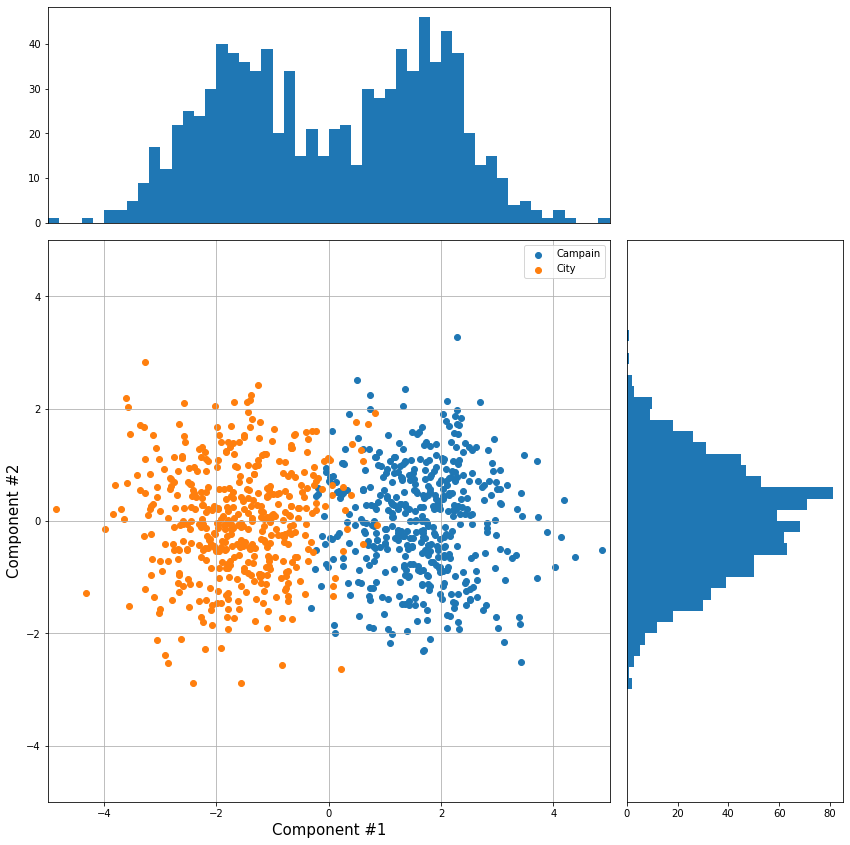

In [234]:
x = PCA_df.iloc[:,0]
y = PCA_df.iloc[:,1]

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.25]
rect_histy = [left_h, bottom, 0.25, height]

# start with a rectangular Figure
plt.figure(1, figsize=(12, 12))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels


# the scatter plot:
for idt, _ in enumerate(targets):
    axScatter.scatter(PCA_df[PCA_df['target'] == idt].iloc[:,0], 
               PCA_df[PCA_df['target'] == idt].iloc[:,1])
    

# now determine nice limits by hand:
binwidth = 0.2
xymax = np.max([np.max(np.fabs(x)), np.max(np.fabs(y))])
lim = (int(xymax/binwidth) + 1) * binwidth

axScatter.set_xlim((-lim, lim))
axScatter.set_ylim((-lim, lim))

bins = np.arange(-lim, lim + binwidth, binwidth)
axHistx.hist(x, bins=bins)
axHisty.hist(y, bins=bins, orientation='horizontal')

axHistx.set_xlim(axScatter.get_xlim())
axHisty.set_ylim(axScatter.get_ylim())

axHistx.set_xticks([])
axHisty.set_yticks([])

axScatter.legend(targets)
axScatter.grid()
axScatter.set_xlabel('Component #1', fontsize = 15)
axScatter.set_ylabel('Component #2', fontsize = 15)
plt.show()

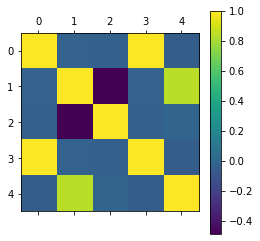

In [196]:
corrMatrix = df.iloc[:,:].corr()
cax = plt.matshow(corrMatrix)
plt.colorbar(cax)
plt.show()

-----
**Assignment #1: Report on the test of the tool on simulated and real dataThe  report  presents  the  assigned  tool  and  its  advantages,  disadvantages,  and  limitations,  bothin  a  theoretical  as  well  as  numerical  way  with  examples  using  synthetic  data  (to  show  specificcharacteristics) and real one.**

In this part, we will show the advantages and disadvantages of the PCA using synthetic data. We then present the limitations of this method both in theoritical and numerical way.



\subsection{Synthetic data}

First of all, we need to construct synthetic data, this is done by creating a dataframe of several random features, where some features are composition of different other features, hence we have some correlated features as well as uncorrelated features.

Let $c_m$ be one of our $M$ data vector and suppose we start with 4 uncorrelated features: 

$$c_m = \left(\mathcal{N}(\mu_1,\,\sigma_1^{2}),\ \mathcal{N}(\mu_2,\,\sigma_2^{2}),\ \mathcal{N}(\mu_3,\,\sigma_3^{2}), \mathcal{N}(\mu_4,\,\sigma_4^{2}) \right)$$ <!--- ^{\intercal}$$ --->

(TODO, if we use different distribution, does it still works? I would say yes)

We finally obtain one row of our synthetic data by appending combinaisons of $c_m$ rows as new features of $c_m$:

$$c_m = \left(c_{m_1}, c_{m_2}, c_{m_3}, c_{m_4}, 2c_{m_1}, c_{m_3}^3, c_{m_2} c_{m_4} \right)$$

To have the complete data, we assume there are $N$ different realization (e.g $N$ cities)

The table~(\ref{tab:data_ex}) is 3 rows of this data